In [1]:
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
offset_df = pd.read_hdf("../../data/offset_stat_129.h5", "df")

In [3]:
import h5py

import numpy as np
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append("../")

In [5]:
import extract_catalog as excat
import get_gal_centroids as getgal

In [6]:
f = h5py.File("../../data/" + 
              "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")

In [7]:
df_list = map(lambda i: excat.extract_clst(f, i), range(129))

In [8]:
ix_list = map(getgal.get_BCG_ix, df_list)

In [9]:
one_BCG_list = np.array([i for i in ix_list if type(i) is np.int64])
two_BCG_list = np.array([i for i in ix_list if type(i) is not np.int64])

In [10]:
np.sum(one_BCG_list == 0)

119

In [11]:
len(one_BCG_list)

129

In [12]:
ix_list[-1]

0

In [13]:
len(two_BCG_list)

0

In [14]:
two_BCG_list

array([], dtype=float64)

In [15]:
bands = [band for band in df_list[0].keys()
         if "band" in band]

In [16]:
df_list[0].keys()

Index([u'SubhaloGrNr', u'SubhaloLenType0', u'SubhaloLenType1', u'SubhaloLenType2', u'SubhaloLenType3', u'SubhaloLenType4', u'SubhaloLenType5', u'SubhaloMass', u'SubhaloMassType0', u'SubhaloMassType1', u'SubhaloMassType2', u'SubhaloMassType3', u'SubhaloMassType4', u'SubhaloMassType5', u'SubhaloPos0', u'SubhaloPos1', u'SubhaloPos2', u'U_band', u'B_band', u'V_band', u'K_band', u'g_band', u'r_band', u'i_band', u'z_band', u'SubhaloStellarPhotometricsMassInRad'], dtype='object')

In [17]:
df_list[0][["SubhaloPos0", "SubhaloPos1"]].iloc[0]

SubhaloPos0    0
SubhaloPos1    0
Name: 0, dtype: float64

In [18]:
BCG_offset = [np.array(
              df_list[i][["SubhaloPos0", "SubhaloPos1"]].iloc[ix_list[i]])
              for i in range(129)]

In [19]:
BCG_offset = np.array(BCG_offset)

In [20]:
BCG_offset = [np.sqrt(np.dot(BCG_offset[i], BCG_offset[i]))
              for i in range(len(BCG_offset))]

In [21]:
BCG_offset

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1509.050714909615,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1020.1144663291774,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1423.7773364677187,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 159.18526226669215,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786.41429037360501,
 0.0,
 0.0,
 0.0,
 0.0,
 303.75476547710133,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 759.11517401996923,
 552.77557710006113,
 0.0,
 0.0,
 944.75589313521414,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 274.00094228603365,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [22]:
offset_df["BCG"] = BCG_offset

In [23]:
offset_df.describe()

,I_lum,R200_I_lum,subhalo_mass,R200_subhalo_mass,stel_mass,R200_stel_mass,subhalo_mass_shrink,stel_mass_shrink,I_band_lum_shrink,no_wwts,R200_no_wwts,BCG
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,37.281424,0.107912,6.244648,0.015942,33.074001,0.092624,32.421342,79.423637,105.185105,93.588492,0.249271,59.945306
std,104.835767,0.319810,5.366485,0.014556,106.514465,0.323545,85.425490,161.551849,173.942993,155.389777,0.427926,241.527803
min,0.027215,0.000043,0.019764,0.000039,0.027215,0.000043,0.050713,1.419611,0.106954,1.752930,0.003495,0.000000
25%,4.118358,0.011613,2.488282,0.005864,4.089556,0.011364,3.702154,13.947211,15.236450,27.584135,0.063680,0.000000
50%,9.941563,0.022478,5.438129,0.013537,8.891282,0.021102,7.863965,29.426165,36.758398,58.804352,0.141601,0.000000
75%,22.080221,0.062774,8.084752,0.020460,21.153036,0.050681,21.448790,74.558264,105.624491,107.548730,0.293187,0.000000
max,775.495415,2.631515,39.114404,0.095803,818.878445,2.897078,782.844077,1481.561506,856.815910,1475.248483,3.673592,1509.050715


In [24]:
offset_df.to_hdf("../../data/offset_stat_129.h5", "df")

In [25]:
import seaborn as sns
sns.set_style("whitegrid")

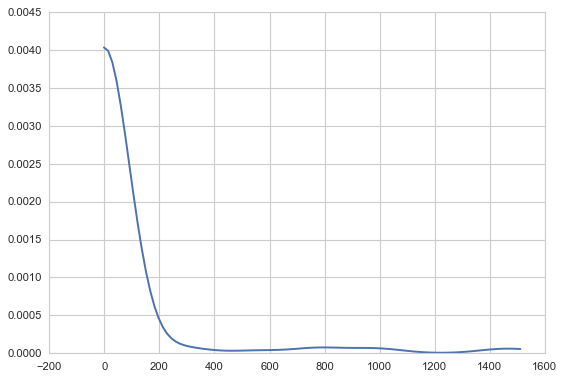

In [26]:
sns.kdeplot(np.array(BCG_offset))

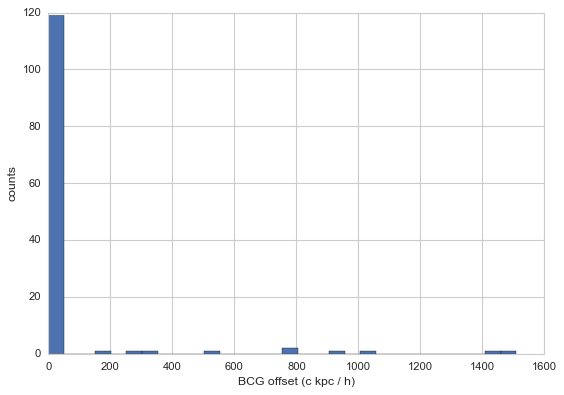

In [27]:
_ = plt.hist(BCG_offset, bins=30)
plt.xlabel("BCG offset (c kpc / h)")
plt.ylabel("counts")